# Preprocess and Explore the Data

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_processing import * 

## Load data

In [2]:
tickers = ["TSLA", "BND", "SPY"]
tsla = load_data('tsla')
bnd = load_data('BND')
spy = load_data('spy')
merged_data = load_data(tickers)
data = merged_data['Close']

2024-11-11 06:11:13,098 - INFO - Loading data from file...
[*********************100%***********************]  1 of 1 completed
2024-11-11 06:11:15,258 - INFO - Data loaded 
2024-11-11 06:11:15,258 - INFO - Loading data from file...
[*********************100%***********************]  1 of 1 completed
2024-11-11 06:11:15,594 - INFO - Data loaded 
2024-11-11 06:11:15,597 - INFO - Loading data from file...
[*********************100%***********************]  1 of 1 completed
2024-11-11 06:11:15,941 - INFO - Data loaded 
2024-11-11 06:11:15,947 - INFO - Loading data from file...
[*********************100%***********************]  3 of 3 completed
2024-11-11 06:11:16,099 - INFO - Data loaded 


## Data cleaning and Understanding

In [11]:
data.head()

Ticker,BND,SPY,TSLA
Date,,,
2015-01-02 00:00:00+00:00,82.650002,205.429993,14.620667
2015-01-05 00:00:00+00:00,82.889999,201.720001,14.006000
2015-01-06 00:00:00+00:00,83.129997,199.820007,14.085333
2015-01-07 00:00:00+00:00,83.180000,202.309998,14.063333
2015-01-08 00:00:00+00:00,83.050003,205.899994,14.041333


In [29]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [30]:
bnd.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND,BND
Date,,,,,,
2015-01-02 00:00:00+00:00,63.358791,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.542725,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.726734,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.765053,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.665340,83.050003,83.110001,82.970001,83.110001,1873400


In [ ]:
spy.head

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173813,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046326,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444641,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543701,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.570007,205.899994,206.160004,203.990005,204.009995,147217800


## Summary 

In [12]:
# Check for basic statistics and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BND     2474 non-null   float64
 1   SPY     2474 non-null   float64
 2   TSLA    2474 non-null   float64
dtypes: float64(3)
memory usage: 77.3 KB


In [3]:
check_missing(data)

Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

### Normalize data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


## Exploratory Data Analysis 

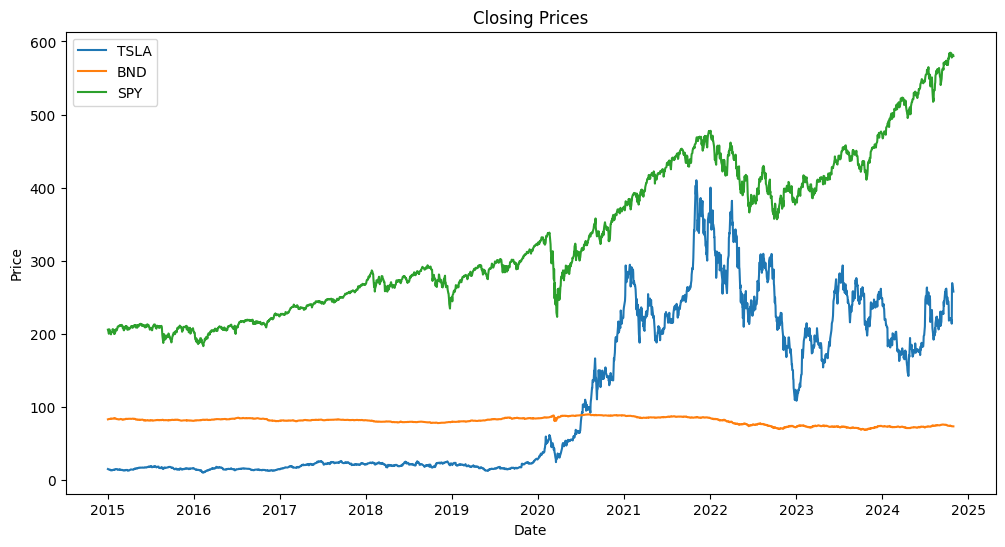

In [39]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


### Daily percentage change

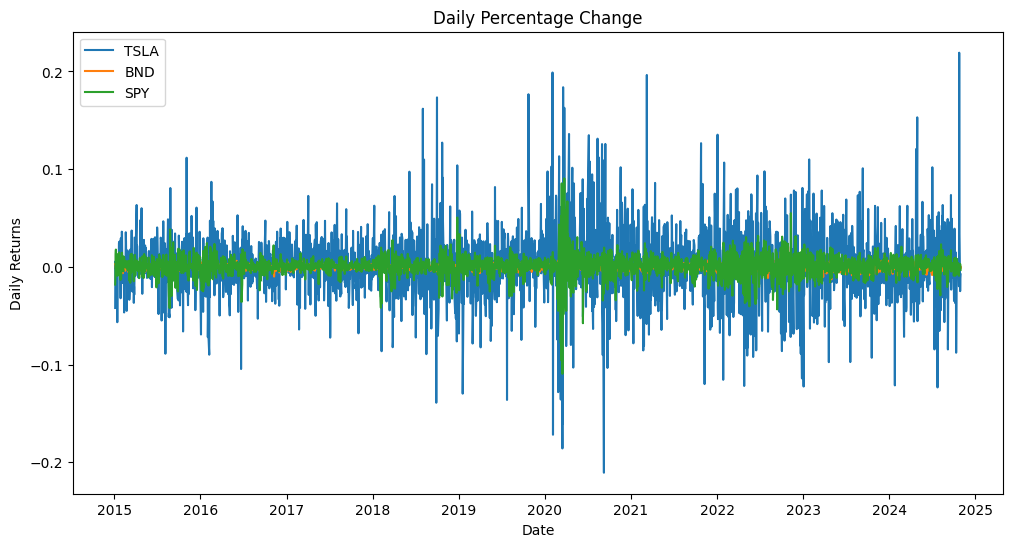

In [7]:
daily_return(tickers)

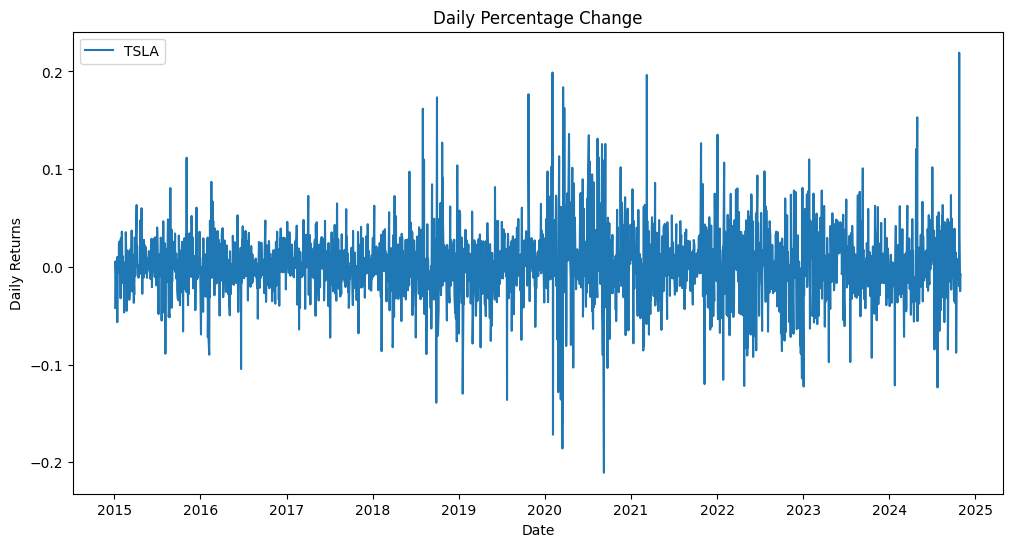

In [ ]:
daily_return('TSLA')

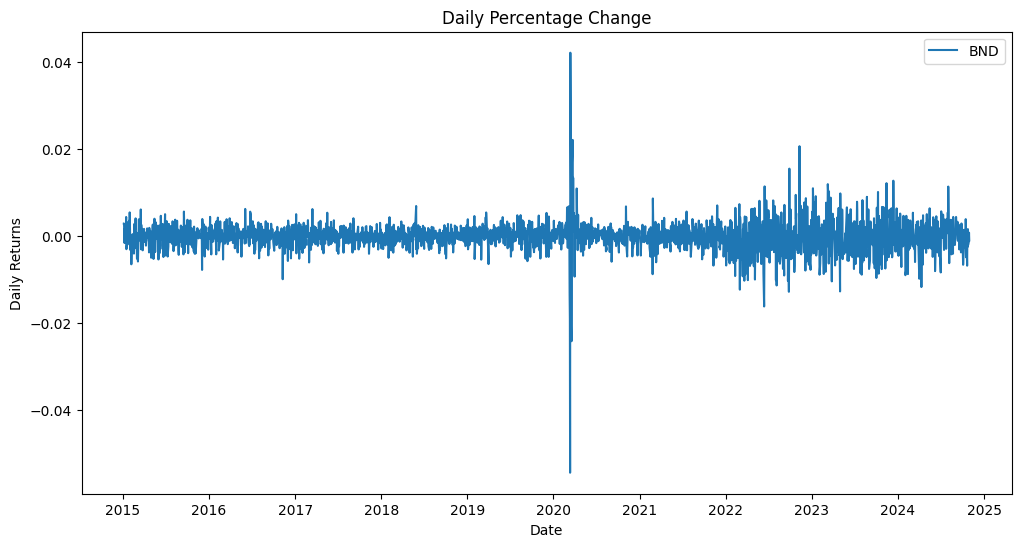

In [ ]:
daily_return('BND')

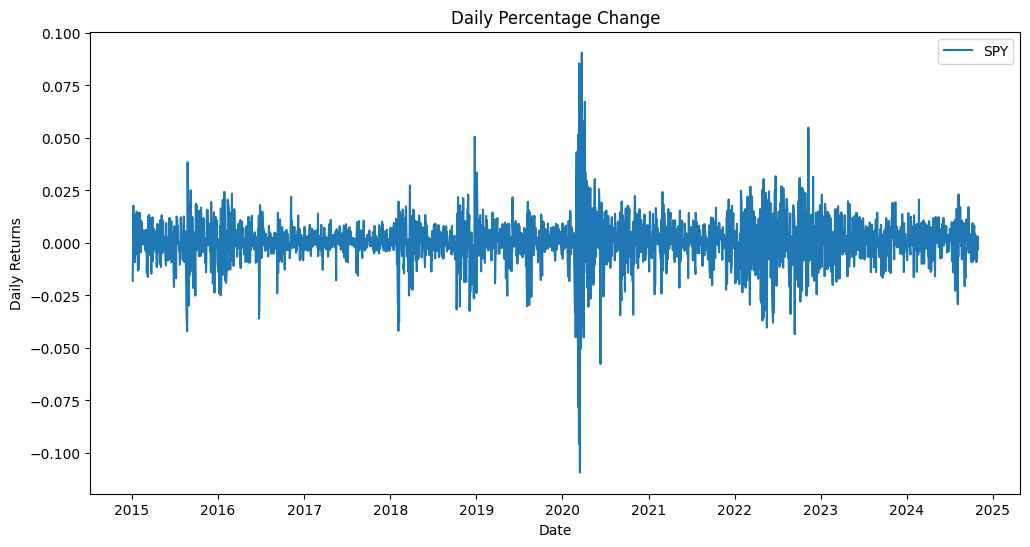

In [ ]:
daily_return('SPY')

In [8]:
daily_returns

Ticker,BND,SPY,TSLA
Date,,,
2015-01-05 00:00:00+00:00,0.002904,-0.018060,-0.042041
2015-01-06 00:00:00+00:00,0.002895,-0.009419,0.005664
2015-01-07 00:00:00+00:00,0.000602,0.012461,-0.001562
2015-01-08 00:00:00+00:00,-0.001563,0.017745,-0.001564
2015-01-09 00:00:00+00:00,0.001686,-0.008014,-0.018802
...,...,...,...
2024-10-24 00:00:00+00:00,0.001640,0.002163,0.219190
2024-10-25 00:00:00+00:00,-0.002046,-0.000345,0.033438
2024-10-28 00:00:00+00:00,-0.001230,0.003091,-0.024815


## Analyze Volatility

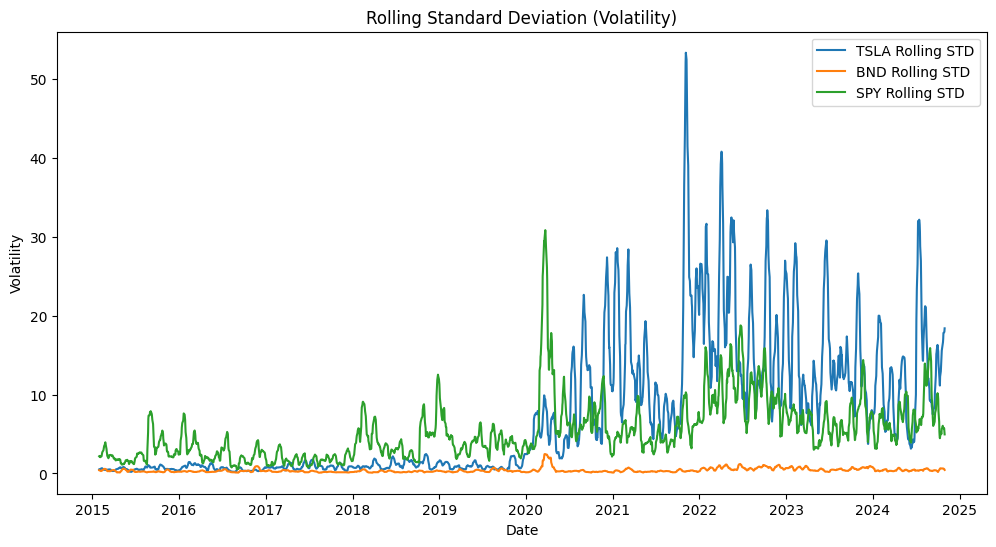

In [56]:
# Define window size (e.g., 20-day rolling window)
window = 20
rolling_mean = data.rolling(window).mean()
rolling_std = data.rolling(window).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_std[ticker], label=f"{ticker} Rolling STD")
plt.title("Rolling Standard Deviation (Volatility)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


### Detecting outliers

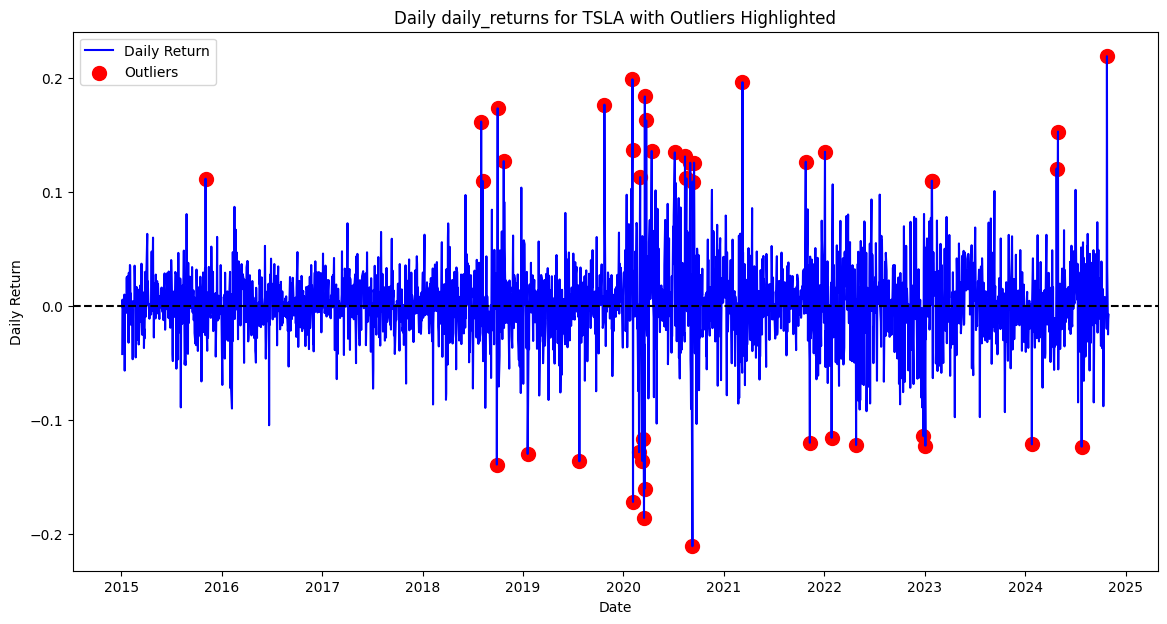

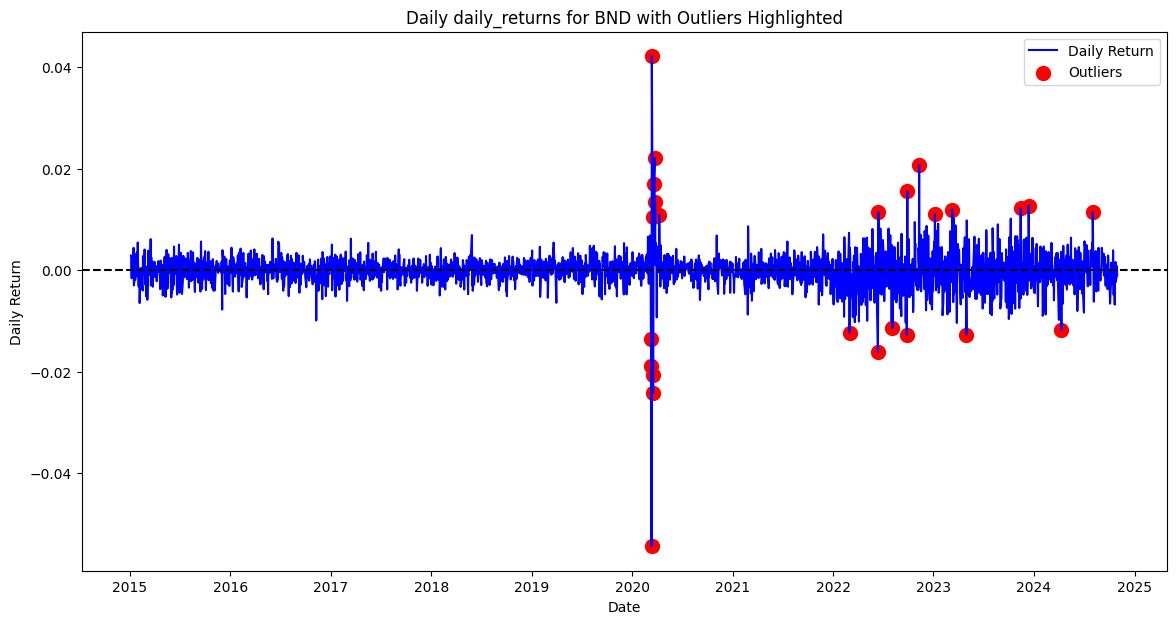

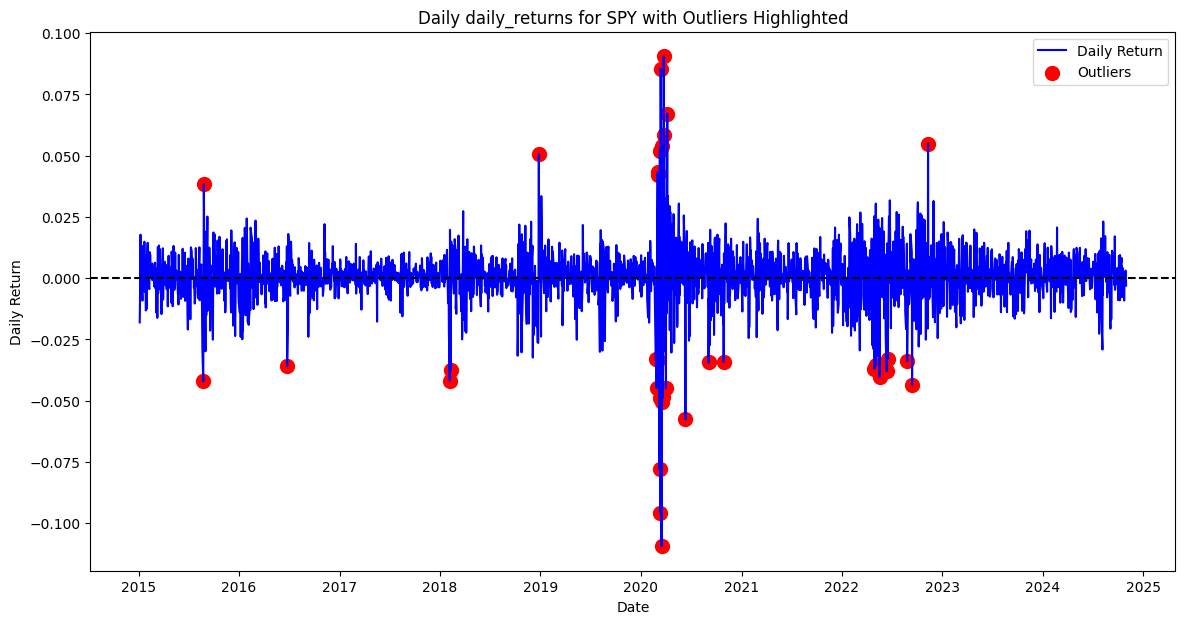


Outlier Days for TSLA:
Ticker                         TSLA
Date                               
2015-11-04 00:00:00+00:00  0.111735
2018-08-02 00:00:00+00:00  0.161880
2018-08-07 00:00:00+00:00  0.109886
2018-09-28 00:00:00+00:00 -0.139015
2018-10-01 00:00:00+00:00  0.173471
2018-10-23 00:00:00+00:00  0.127189
2019-01-18 00:00:00+00:00 -0.129711
2019-07-25 00:00:00+00:00 -0.136137
2019-10-24 00:00:00+00:00  0.176692
2020-02-03 00:00:00+00:00  0.198949
2020-02-04 00:00:00+00:00  0.137256
2020-02-05 00:00:00+00:00 -0.171758
2020-02-27 00:00:00+00:00 -0.128146
2020-03-02 00:00:00+00:00  0.113220
2020-03-09 00:00:00+00:00 -0.135725
2020-03-12 00:00:00+00:00 -0.116172
2020-03-16 00:00:00+00:00 -0.185778
2020-03-18 00:00:00+00:00 -0.160344
2020-03-19 00:00:00+00:00  0.183877
2020-03-24 00:00:00+00:00  0.162817
2020-04-13 00:00:00+00:00  0.136038
2020-07-06 00:00:00+00:00  0.134794
2020-08-12 00:00:00+00:00  0.131236
2020-08-17 00:00:00+00:00  0.112031
2020-08-31 00:00:00+00:00  0.125689
2020

In [ ]:

# Detect outliers for each ticker
outlier_days = {}

threshold = 3  # Z-score threshold for outlier detection

for ticker in tickers:
    mean_return = daily_returns[ticker].mean()
    std_return = daily_returns[ticker].std()
    
    # Calculate Z-scores
    z_scores = (daily_returns[ticker] - mean_return) / std_return
    
    # Identify outliers
    outliers = daily_returns[(z_scores > threshold) | (z_scores < -threshold)][[ticker]]
    outlier_days[ticker] = outliers

    #  Visualize daily daily_returns and outliers for each ticker
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=daily_returns[ticker], label='Daily Return', color='blue')
    plt.scatter(outliers.index, outliers[ticker], color='red', s=100, label='Outliers')
    plt.title(f'Daily daily_returns for {ticker} with Outliers Highlighted')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.legend()
    plt.show()

#  Analyze the outliers
for ticker, outliers in outlier_days.items():
    print(f"\nOutlier Days for {ticker}:")
    print(outliers)

## Seasonality and Trends

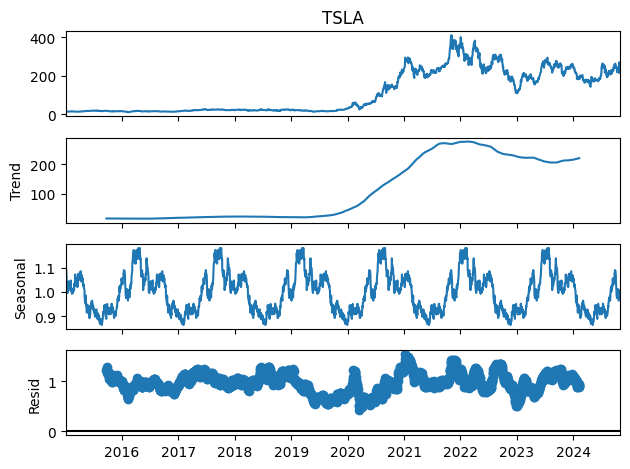

In [12]:
seasonality(data,'TSLA')

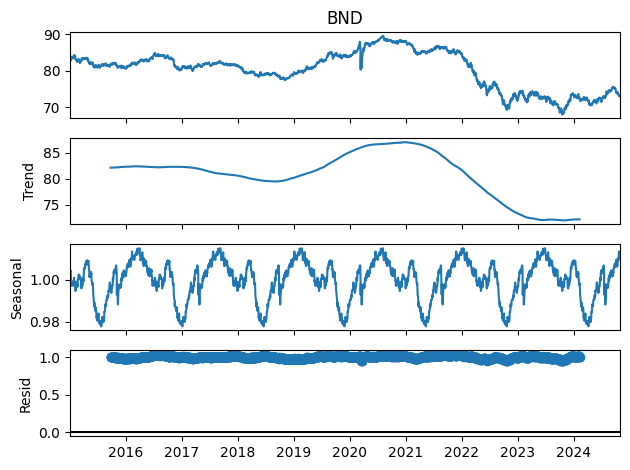

In [13]:
seasonality(data,'BND')

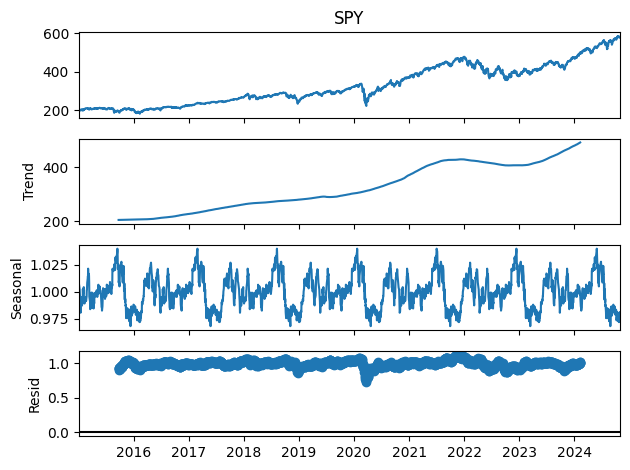

In [14]:
seasonality(data,'SPY')

In [64]:
confidence_level = 0.05  # For 95% confidence
VaR = daily_returns.quantile(confidence_level, axis=0)


In [65]:
VaR

Ticker
BND    -0.005083
SPY    -0.016798
TSLA   -0.051257
Name: 0.05, dtype: float64

In [19]:
risk_free_rate = 0.02  # Assume a risk-free rate of 2%
sharpe_ratios = (daily_returns.mean() - risk_free_rate) / daily_returns.std()


In [20]:
sharpe_ratios

Ticker
BND    -5.795010
SPY    -1.745314
TSLA   -0.508375
dtype: float64